<a href="https://colab.research.google.com/github/NorahEkuttan/Core-Week-6-IP-Supervised/blob/main/Final_Moringa_School_WEEK_6_IP_NORAH_NAROH_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis - Exercise 2

## 1. Defining the Question

### a) Specifying the Question

Overview 

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

### b) Defining the Metric for Success
Approach 1: Polynomial approach

*   Model 1: Predict how many goals the home team scores.

*   Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)






### c) Understanding the context 

*   In December 1992, FIFA first published a listing in rank order of its men's member associations to provide a basis for comparison of the relative strengths of these teams.




### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [476]:
#importing the necessary librar
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [477]:
# Loading the Dataset
#the d_parser is used to read date as datetime instead of objects

d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
fifa= pd.read_csv('/content/fifa_ranking.csv', parse_dates=['rank_date'], date_parser=d_parser)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [478]:
#finding the null values
fifa.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [479]:
fifa.duplicated().sum()

37

In [480]:
#dropping the duplicated columns
data = fifa.drop_duplicates()
data

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [481]:
data.duplicated().sum()

0

In [482]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57756 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57756 non-null  int64         
 1   country_full             57756 non-null  object        
 2   country_abrv             57756 non-null  object        
 3   total_points             57756 non-null  float64       
 4   previous_points          57756 non-null  int64         
 5   rank_change              57756 non-null  int64         
 6   cur_year_avg             57756 non-null  float64       
 7   cur_year_avg_weighted    57756 non-null  float64       
 8   last_year_avg            57756 non-null  float64       
 9   last_year_avg_weighted   57756 non-null  float64       
 10  two_year_ago_avg         57756 non-null  float64       
 11  two_year_ago_weighted    57756 non-null  float64       
 12  three_year_ago_avg       57756 n

In [483]:
data.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [484]:
data.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [485]:
#Reading the results dataset
results = pd.read_csv('/content/results.csv', parse_dates=['date'], date_parser=d_parser)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [486]:
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [487]:
results.duplicated().sum()

0

In [488]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [489]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [490]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

## 2. Checking the Data

In [491]:
# Checking whether each column has an appropriate datatype
#
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [492]:
data.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

In [493]:
#We drop all the columns that we dont need in our case we have city
results.drop(['city'],axis=1,inplace=True)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [494]:
data.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [495]:
#we drop all the columns that we dont need in this case we have 
#'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
#'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg','three_year_ago_weighted'

In [496]:
data.drop(['country_abrv','cur_year_avg','cur_year_avg_weighted','last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted'],axis=1,inplace=True)
data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,rank,country_full,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,0.0,57,0,UEFA,1993-08-08
1,2,Italy,0.0,57,0,UEFA,1993-08-08
2,3,Switzerland,0.0,50,9,UEFA,1993-08-08
3,4,Sweden,0.0,55,0,UEFA,1993-08-08
4,5,Argentina,0.0,51,5,CONMEBOL,1993-08-08


<Figure size 648x360 with 0 Axes>

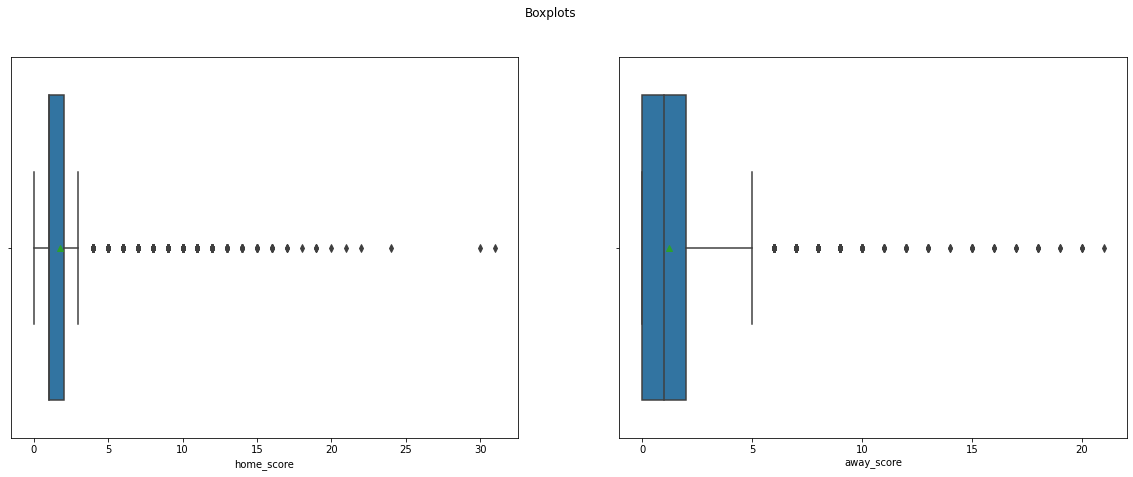

In [497]:
#checking for outliers for results
fig = plt.figure(figsize= (9,5),edgecolor='lightgreen')
fig,(ax1,ax2) =plt.subplots(1,2, figsize=(20,7))
fig.suptitle('Boxplots')
sb.boxplot(data=results,x=results['home_score'],ax=ax1,showmeans=True)
sb.boxplot(data=results,x=results['away_score'],ax=ax2,showmeans=True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

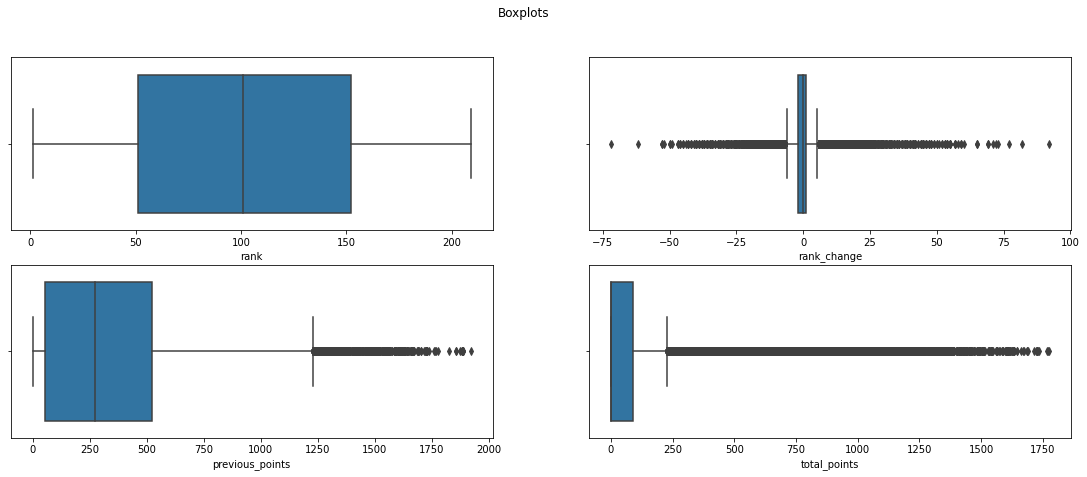

In [498]:
#checking the outliers for the fifa data
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(19, 7))
fig.suptitle('Boxplots')
sb.boxplot(data['rank'], ax=ax1)
sb.boxplot(data['rank_change'], ax=ax2)
sb.boxplot(data['previous_points'], ax=ax3)
sb.boxplot(data['total_points'], ax=ax4)


In [499]:
#We can see tha
#The common columns are date and rank date and also country full and country
#We are going to separate the date to months and years

In [500]:
data['year'] = data.rank_date.dt.year

data['month'] = data.rank_date.dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [501]:
data['year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [502]:
results['year'] = results.date.dt.year

results['month'] = results.date.dt.month

In [503]:
results['year'].unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [504]:
results.drop(['date'],axis=1,inplace=True)

In [505]:
#filtering the result year to get years betwween 1993-2018

R1 = results['year'] > 1992
R2 = results['year'] < 2019
result= results[R1 & R2]

In [506]:
result.year.value_counts()

2008    1091
2011    1081
2004    1064
2000    1026
2001    1018
2012    1012
2015    1003
2007     978
2013     966
2017     958
2003     936
2016     926
2009     897
1997     863
2014     859
2018     855
2010     854
2006     838
1996     829
2005     804
2002     752
1999     739
1993     733
1998     698
1995     641
1994     569
Name: year, dtype: int64

In [507]:
data

,rank,country_full,total_points,previous_points,rank_change,confederation,rank_date,year,month
0,1,Germany,0.0,57,0,UEFA,1993-08-08,1993,8
1,2,Italy,0.0,57,0,UEFA,1993-08-08,1993,8
2,3,Switzerland,0.0,50,9,UEFA,1993-08-08,1993,8
3,4,Sweden,0.0,55,0,UEFA,1993-08-08,1993,8
4,5,Argentina,0.0,51,5,CONMEBOL,1993-08-08,1993,8
...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,0.0,0,1,CONCACAF,2018-06-07,2018,6
57789,206,Bahamas,0.0,0,1,CONCACAF,2018-06-07,2018,6
57790,206,Eritrea,0.0,0,1,CAF,2018-06-07,2018,6
57791,206,Somalia,0.0,0,1,CAF,2018-06-07,2018,6


In [508]:
#dropping all the columns we dont need
data.drop(['rank_date','total_points','previous_points','rank_change','confederation'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [509]:
data.shape

(57756, 4)

In [510]:
data.head(1)

,rank,country_full,year,month
0,1,Germany,1993,8


In [511]:
result.shape


(22990, 9)

In [512]:
result.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'country', 'neutral', 'year', 'month'],
      dtype='object')

### Merging the two datasets

In [513]:
#Merging the 2 datasets
#We will create 2 datasets one of home and another of away then we merge them

home = pd.merge(data, result, how = 'inner', left_on = ['year','month','country_full'], right_on = ['year','month','home_team'])



In [514]:
home

,rank,country_full,year,month,home_team,away_team,home_score,away_score,tournament,country,neutral
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification,Sweden,False
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina,False
3,5,Argentina,1993,8,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False
4,8,Brazil,1993,8,Brazil,Mexico,1,1,Friendly,Brazil,False
...,...,...,...,...,...,...,...,...,...,...,...
18588,139,Botswana,2018,6,Botswana,Mauritius,6,0,COSAFA Cup,South Africa,True
18589,147,Lesotho,2018,6,Lesotho,Eswatini,1,0,COSAFA Cup,South Africa,True
18590,147,Lesotho,2018,6,Lesotho,Zimbabwe,0,0,COSAFA Cup,South Africa,True
18591,160,Barbados,2018,6,Barbados,Belize,0,0,Friendly,Barbados,False


In [515]:
#changing the column name to match the data set
data.columns

Index(['rank', 'country_full', 'year', 'month'], dtype='object')

In [516]:
result.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'country', 'neutral', 'year', 'month'],
      dtype='object')

In [517]:
home.columns

Index(['rank', 'country_full', 'year', 'month', 'home_team', 'away_team',
       'home_score', 'away_score', 'tournament', 'country', 'neutral'],
      dtype='object')

In [518]:
home

,rank,country_full,year,month,home_team,away_team,home_score,away_score,tournament,country,neutral
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification,Sweden,False
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina,False
3,5,Argentina,1993,8,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False
4,8,Brazil,1993,8,Brazil,Mexico,1,1,Friendly,Brazil,False
...,...,...,...,...,...,...,...,...,...,...,...
18588,139,Botswana,2018,6,Botswana,Mauritius,6,0,COSAFA Cup,South Africa,True
18589,147,Lesotho,2018,6,Lesotho,Eswatini,1,0,COSAFA Cup,South Africa,True
18590,147,Lesotho,2018,6,Lesotho,Zimbabwe,0,0,COSAFA Cup,South Africa,True
18591,160,Barbados,2018,6,Barbados,Belize,0,0,Friendly,Barbados,False


In [519]:
home.rename(columns={'rank':'home_rank','country_full':'home_country'}, inplace = True)

In [520]:
home

,home_rank,home_country,year,month,home_team,away_team,home_score,away_score,tournament,country,neutral
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification,Sweden,False
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina,False
3,5,Argentina,1993,8,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False
4,8,Brazil,1993,8,Brazil,Mexico,1,1,Friendly,Brazil,False
...,...,...,...,...,...,...,...,...,...,...,...
18588,139,Botswana,2018,6,Botswana,Mauritius,6,0,COSAFA Cup,South Africa,True
18589,147,Lesotho,2018,6,Lesotho,Eswatini,1,0,COSAFA Cup,South Africa,True
18590,147,Lesotho,2018,6,Lesotho,Zimbabwe,0,0,COSAFA Cup,South Africa,True
18591,160,Barbados,2018,6,Barbados,Belize,0,0,Friendly,Barbados,False


In [521]:
away = pd.merge(data, result, how = 'inner', left_on = ['year', 'month','country_full'], 
                     right_on = ['year', 'month','away_team'])

In [522]:
away

,rank,country_full,year,month,home_team,away_team,home_score,away_score,tournament,country,neutral
0,3,Switzerland,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,5,Argentina,1993,8,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False
2,5,Argentina,1993,8,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,False
3,5,Argentina,1993,8,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,False
4,8,Brazil,1993,8,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False
...,...,...,...,...,...,...,...,...,...,...,...
18497,139,Botswana,2018,6,Zimbabwe,Botswana,1,1,COSAFA Cup,South Africa,True
18498,139,Botswana,2018,6,Eswatini,Botswana,0,2,COSAFA Cup,South Africa,True
18499,155,Mauritius,2018,6,Botswana,Mauritius,6,0,COSAFA Cup,South Africa,True
18500,163,Belize,2018,6,Barbados,Belize,0,0,Friendly,Barbados,False


In [523]:
away.rename({'rank':'away_rank','country_full':'away_country'}, axis= 1, inplace = True)

In [524]:
away

,away_rank,away_country,year,month,home_team,away_team,home_score,away_score,tournament,country,neutral
0,3,Switzerland,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,5,Argentina,1993,8,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False
2,5,Argentina,1993,8,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,False
3,5,Argentina,1993,8,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,False
4,8,Brazil,1993,8,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False
...,...,...,...,...,...,...,...,...,...,...,...
18497,139,Botswana,2018,6,Zimbabwe,Botswana,1,1,COSAFA Cup,South Africa,True
18498,139,Botswana,2018,6,Eswatini,Botswana,0,2,COSAFA Cup,South Africa,True
18499,155,Mauritius,2018,6,Botswana,Mauritius,6,0,COSAFA Cup,South Africa,True
18500,163,Belize,2018,6,Barbados,Belize,0,0,Friendly,Barbados,False


In [525]:
home_away = pd.merge(home,away, how='inner', left_on=['year','month','away_team','home_score','away_score','home_team','tournament','country','neutral'],right_on=['year','month','away_team','home_score','away_score','home_team','tournament', 'country','neutral'])

In [526]:
home_away.columns

Index(['home_rank', 'home_country', 'year', 'month', 'home_team', 'away_team',
       'home_score', 'away_score', 'tournament', 'country', 'neutral',
       'away_rank', 'away_country'],
      dtype='object')

In [527]:
home_away.isnull().sum()

home_rank       0
home_country    0
year            0
month           0
home_team       0
away_team       0
home_score      0
away_score      0
tournament      0
country         0
neutral         0
away_rank       0
away_country    0
dtype: int64

In [528]:
home_away.duplicated().sum()

126

In [529]:
home_away = home_away.drop_duplicates()

In [530]:
home_away.duplicated().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

<Figure size 648x360 with 0 Axes>

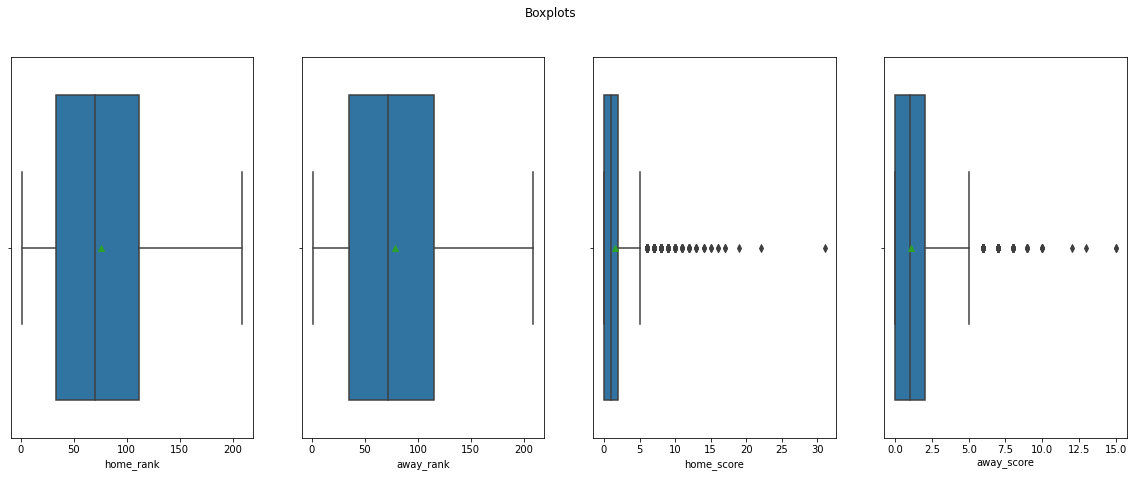

In [531]:
# Visualizing the data outliers using boxplots
fig = plt.figure(figsize= (9,5),edgecolor='lightgreen')
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,7))
fig.suptitle('Boxplots')
sb.boxplot(home_away['home_rank'],ax=ax1,showmeans=True)
sb.boxplot(home_away['away_rank'],ax=ax2,showmeans=True)
sb.boxplot(home_away['home_score'],ax=ax3,showmeans=True)
sb.boxplot(home_away['away_score'],ax=ax4,showmeans=True)

The outliers for this data is very few and can be really helpful in predicting the data hence we dont need to drop

In [532]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'neutral'.
home_away['neutral']= label_encoder.fit_transform(home_away['neutral'])
home_away['neutral'].unique()

array([0, 1])

# 3. Exploratory Analysis

# Univariate Analysis

## Categorical Variables 

Frequency tables

In [533]:
home_away.neutral.value_counts()

0    12883
1     3981
Name: neutral, dtype: int64

In [534]:
home_away.tournament.value_counts()

Friendly                                6408
FIFA World Cup qualification            3950
UEFA Euro qualification                 1383
African Cup of Nations qualification     871
AFC Asian Cup qualification              387
                                        ... 
Copa del Pacífico                          4
Dragon Cup                                 4
OSN Cup                                    4
Copa América qualification                 2
SKN Football Festival                      2
Name: tournament, Length: 65, dtype: int64

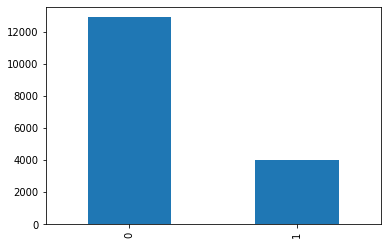

<Figure size 1008x648 with 0 Axes>

In [535]:
home_away['neutral'].value_counts().plot(kind='bar')
fig=plt.figure(figsize=(14,9))
plt.show()

### Continous Variables

In [536]:
mean = home_away["home_score"].mean()
median = home_away["home_score"].median()
mode = home_away["home_score"].mode()
std = home_away["home_score"].std()
var = home_away["home_score"].var()
max = home_away["home_score"].max()
min = home_away["home_score"].min()
range = max - min
quantile = home_away["home_score"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 1.6046015180265654
The median is 1.0
The mode is 0    1
dtype: int64
The standard deviation is 1.6159724846769814
The variance is 2.611367071233097
The Range is 31
The quantile is 0.25    0.0
0.50    1.0
0.75    2.0
Name: home_score, dtype: float64


In [537]:
mean = home_away["away_score"].mean()
median = home_away["away_score"].median()
mode = home_away["away_score"].mode()
std = home_away["away_score"].std()
var = home_away["away_score"].var()
max = home_away["away_score"].max()
min = home_away["away_score"].min()
range = max - min
quantile = home_away["away_score"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 1.0696157495256167
The median is 1.0
The mode is 0    0
dtype: int64
The standard deviation is 1.2459094216764777
The variance is 1.5522902870222148
The Range is 15
The quantile is 0.25    0.0
0.50    1.0
0.75    2.0
Name: away_score, dtype: float64


In [538]:
# Ploting the univariate summaries and recording our observations
#
mean = home_away["home_rank"].mean()
median = home_away["home_rank"].median()
mode = home_away["home_rank"].mode()
std = home_away["home_rank"].std()
var = home_away["home_rank"].var()
max = home_away["home_rank"].max()
min = home_away["home_rank"].min()
range = max - min
quantile = home_away["home_rank"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 76.02988614800759
The median is 70.0
The mode is 0    5
dtype: int64
The standard deviation is 50.85349756773571
The variance is 2586.0782148717017
The Range is 208
The quantile is 0.25     33.0
0.50     70.0
0.75    112.0
Name: home_rank, dtype: float64


In [539]:
mean = home_away["away_rank"].mean()
median = home_away["away_rank"].median()
mode = home_away["away_rank"].mode()
std = home_away["away_rank"].std()
var = home_away["away_rank"].var()
max = home_away["away_rank"].max()
min = home_away["away_rank"].min()
range = max - min
quantile = home_away["away_rank"].quantile([0.25,0.5,0.75])
print('The mean is',mean)
print('The median is',median)
print('The mode is',mode)
print('The standard deviation is',std)
print('The variance is',var)
print('The Range is',range)
print('The quantile is',quantile)

The mean is 78.86201375711575
The median is 72.0
The mode is 0    1
dtype: int64
The standard deviation is 52.008990178252134
The variance is 2704.935059361527
The Range is 208
The quantile is 0.25     35.0
0.50     72.0
0.75    115.0
Name: away_rank, dtype: float64


In [540]:
kurt1 = home_away['home_rank'].kurt()
print("The kurtosis for the home_rank  is: ", kurt1)
if kurt1 > 0:
  print("Leptokurtic")
elif kurt1 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt2 = home_away['away_rank'].kurt()
print("The kurtosis for the away_rank is: ", kurt2)
if kurt2 > 0:
  print("Leptokurtic")
elif kurt2 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt3 = home_away['home_score'].kurt()
print("The kurtosis for the home_score is: ", kurt3)
if kurt3 > 0:
  print("Leptokurtic")
elif kurt3 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt4 = home_away['away_score'].kurt()
print("The kurtosis for the away_score is: ", kurt4)
if kurt4 > 0:
  print("Leptokurtic")
elif kurt4 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

The kurtosis for the home_rank  is:  -0.6878888085628345
Platykurtic


The kurtosis for the away_rank is:  -0.7064259982554106
Platykurtic


The kurtosis for the home_score is:  15.265077316005975
Leptokurtic


The kurtosis for the away_score is:  7.157593286498087
Leptokurtic




In [541]:
# Skewness
skew1 = home_away['home_rank'].skew()
print("The skewness for the home_rank is: ", skew1)
if skew1 == 0:
  print("The distribution is symmetrical")
elif skew1 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew2 = home_away['away_rank'].skew()
print("The skewness for the away_rank is: ", skew2)
if skew2 == 0:
  print("The distribution is symmetrical")
elif skew2 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew3 = home_away['home_score'].skew()
print("The skewness for the home_score is: ", skew3)
if skew3 == 0:
  print("The distribution is symmetrical")
elif skew3 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew4 = home_away['away_score'].skew()
print("The skewness for the away_score is: ", skew4)
if skew4 == 0:
  print("The distribution is symmetrical")
elif skew4 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')


The skewness for the home_rank is:  0.44818550479767305
The distribution is positively skewed


The skewness for the away_rank is:  0.4476944492702198
The distribution is positively skewed


The skewness for the home_score is:  2.3260890277280213
The distribution is positively skewed


The skewness for the away_score is:  1.9274650196937393
The distribution is positively skewed




  Summary 


*  We ca see that all our continous variables are positively skewed
*  In Kurtosis the homerank and away rank are Platykurtic while the  homescore and away score Leptokurtic 
* The mean for the home_score was 1.60 while the mean for away score was 1.07 this show that home score had a greater mean.
* Away rank had a greater mean of 78 while homerank was 76 


# BIVARIATE ANALYSIS

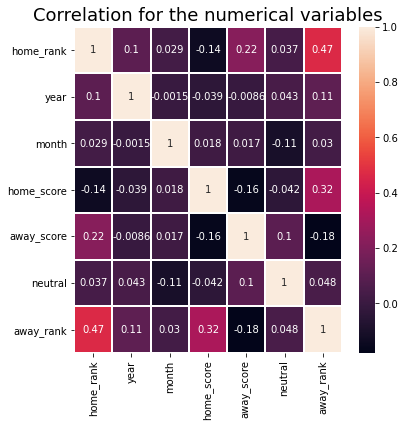

In [542]:
corr = home_away.corr()
plt.figure(figsize=(6,6))
sb.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidth=1.0,annot=True)
plt.title('Correlation for the numerical variables',fontsize=18)
plt.show()

Our correlation for this dataset was weak so we decided to use any data above 0.1 as our independent variable.
We created 2 models for predicting  Home and away score and calculated it using the polynomial regression

# IMPLEMPLEMENT THE SOLUTIONS

## POLYNOMIAL REGRESSION

### Model 1 : Predicting Home Score 
Steps for implementing our model


1.   Checking for Multicollineality
2.   



### Checking for Multicollinearlity

In [543]:

independent_only = home_away[['home_rank','away_rank','away_score']]
# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

,home_rank,away_rank,away_score
home_rank,1.000000,0.469472,0.221711
away_rank,0.469472,1.000000,-0.179898
away_score,0.221711,-0.179898,1.000000


In [544]:
#displaying our vif score
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,home_rank,away_rank,away_score
home_rank,1.464725,-0.771021,-0.463451
away_rank,-0.771021,1.439306,0.429872
away_score,-0.463451,0.429872,1.180086


Since our VIF are not close to 5 we can say upto that point our data is good and we can proceed

## Computing the Polynomial regressiom

In [545]:
#adding the additional libraries

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [546]:
#preparing the data
X= home_away[['home_rank','away_rank','away_score']]
y= home_away['home_score'].values

In [547]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree =2) 
X_poly = poly_reg.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)


pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [548]:
y_pred = pol_reg.predict(X_test)

In [549]:
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,3373.000000,3373.000000
mean,1.573080,1.606651
std,1.610062,0.751191
min,0.000000,-0.039971
25%,0.000000,1.102596
50%,1.000000,1.469416
75%,2.000000,1.975168
max,16.000000,5.881108


In [550]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 1.0389446725275626
Mean Squared Error: 1.991291237813451
Root Mean Squared Error: 1.4111311908584017


The RMSE is 1.41 which is greater than 10% of the mean of homescore so we can its that accurate and we can go and look at other factors

### Kfold Cross Validation

In [551]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X = home_away[['home_rank', 'away_rank', 'away_score']].values
y = home_away['home_score'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.4848774807261145

Training model 2
Model 2 Root Mean Squared Error: 1.6216257869567638

Training model 3
Model 3 Root Mean Squared Error: 1.3617903305507173

Training model 4
Model 4 Root Mean Squared Error: 1.3734077715359432

Training model 5
Model 5 Root Mean Squared Error: 1.3561342492105248


In [552]:
np.mean(RMSES)

1.4395671237960128

From the cross validation we can see that the RMSE,mean 1.44 is close  to the RMSE computed above which 1.41

## Bartlett's test

**Finding Residuals**

In [553]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()


,0
count,3372.000000
mean,0.157081
std,1.347206
min,-12.227364
25%,-0.568160
50%,0.304733
75%,1.077475
max,3.384944


In [554]:
residuals.mean()

0.15708100379429815

In [555]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)
test_result, p_value

(983.915841698364, 5.628730476050463e-216)

In [556]:
# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogenous across our data



inf


In [557]:
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


### Model 2 : Predicting Away Score

### Checking for Multicollinearlity

In [558]:
independent_only = home_away[['home_rank','away_rank','home_score']]
# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

,home_rank,away_rank,home_score
home_rank,1.000000,0.469472,-0.135415
away_rank,0.469472,1.000000,0.318738
home_score,-0.135415,0.318738,1.000000


In [559]:
#computing the vif score
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)




,home_rank,away_rank,home_score
home_rank,1.451059,-0.827980,0.460404
away_rank,-0.827980,1.585531,-0.617491
home_score,0.460404,-0.617491,1.259164


Our VIF score are not close to 5 hence we can say there is no multicollineality

### Computing the ploynomial regression

In [560]:
X= home_away[['home_rank','away_rank','home_score']]
y= home_away['away_score']

In [561]:
poly_reg = PolynomialFeatures(degree =2) 
X_poly = poly_reg.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)


pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [562]:
y_pred = pol_reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.8552253306656421
Mean Squared Error: 1.2728341223378108
Root Mean Squared Error: 1.1281995046700786


### Kfold cross validation

In [563]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X = home_away[['home_rank', 'away_rank', 'home_score']].values
y = home_away['away_score'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.146784716380209

Training model 2
Model 2 Root Mean Squared Error: 1.18107763528462

Training model 3
Model 3 Root Mean Squared Error: 1.1840742976762093

Training model 4
Model 4 Root Mean Squared Error: 1.1238163873271958

Training model 5
Model 5 Root Mean Squared Error: 1.1001990992517385


In [564]:
np.mean(RMSES)

1.1471904271839946

# Bartlettes test

**Finding the residuals**

In [565]:
residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

,0
count,3372.000000
mean,0.032680
std,1.099877
min,-6.265534
25%,-0.560425
50%,0.195040
75%,0.851128
max,2.538400


In [566]:
residuals.mean()

0.032679609093567194

In [567]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)
test_result, p_value

(1927.790513345626, 0.0)

In [568]:
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)


inf


In [569]:
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


### LOGISTIC REGRESSION

In [570]:

# Feature Engineering to Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

def match_result(row):
  if row['home_score'] < row['away_score']:
    outcome = 'Lose'
  elif row['home_score'] > row['away_score']:
    outcome = 'Win'
  else:
    outcome = 'Draw'
  return outcome

home_away['match_result'] = home_away.apply(match_result, axis=1)
home_away

,home_rank,home_country,year,month,home_team,away_team,home_score,away_score,tournament,country,neutral,away_rank,away_country,match_result
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly,Sweden,0,3,Switzerland,Lose
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification,Sweden,0,12,France,Draw
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina,0,70,Peru,Win
3,5,Argentina,1993,8,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,0,67,Paraguay,Draw
4,8,Brazil,1993,8,Brazil,Mexico,1,1,Friendly,Brazil,0,14,Mexico,Draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16985,137,Angola,2018,6,Angola,Malawi,0,0,COSAFA Cup,South Africa,1,123,Malawi,Draw
16986,139,Botswana,2018,6,Botswana,Mauritius,6,0,COSAFA Cup,South Africa,1,155,Mauritius,Win
16987,147,Lesotho,2018,6,Lesotho,Zimbabwe,0,0,COSAFA Cup,South Africa,1,118,Zimbabwe,Draw
16988,160,Barbados,2018,6,Barbados,Belize,0,0,Friendly,Barbados,0,163,Belize,Draw


In [571]:
home_away.match_result.value_counts()

Win     8158
Lose    4666
Draw    4040
Name: match_result, dtype: int64

In [572]:
#label encoder for the match results since it has 3 variables and therefore we could not use dummy 
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
home_away['match_result'] = labelencoder.fit_transform(home_away['match_result'])


In [573]:
home_away.match_result.value_counts()

2    8158
1    4666
0    4040
Name: match_result, dtype: int64

In [574]:
home_away.drop(['year','home_country','month','tournament','country','neutral'],axis=1,inplace=True)
home_away.head()

,home_rank,home_team,away_team,home_score,away_score,away_rank,away_country,match_result
0,4,Sweden,Switzerland,1,2,3,Switzerland,1
1,4,Sweden,France,1,1,12,France,0
2,5,Argentina,Peru,2,1,70,Peru,2
3,5,Argentina,Paraguay,0,0,67,Paraguay,0
4,8,Brazil,Mexico,1,1,14,Mexico,0


In [575]:

X = home_away[['home_rank', 'away_rank', 'home_score','away_score']].values
y = home_away['match_result'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [576]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
LogReg 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [577]:
y_pred = LogReg.predict(X_test)

In [578]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[1193,    0,    0],
       [   0, 1416,    0],
       [   0,    0, 2451]])

## 8. Challenging the solution

> So we are going to be challenging our data by using kfold again but with a different number of fold to see if it is consistent in our data.






### Kfold cross validation for model 1

In [579]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X = home_away[['home_rank', 'away_rank', 'away_score']].values
y = home_away['home_score'].values

folds = KFold(n_splits=10)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 1.3498145297403528

Training model 2
Model 2 Root Mean Squared Error: 1.6069601193477747

Training model 3
Model 3 Root Mean Squared Error: 1.7784291199842965

Training model 4
Model 4 Root Mean Squared Error: 1.4431519841780154

Training model 5
Model 5 Root Mean Squared Error: 1.3310528193625848

Training model 6
Model 6 Root Mean Squared Error: 1.3923330624321106

Training model 7
Model 7 Root Mean Squared Error: 1.3920844128786865

Training model 8
Model 8 Root Mean Squared Error: 1.3540997814019853

Training model 9
Model 9 Root Mean Squared Error: 1.3124651210913167

Training model 10
Model 10 Root Mean Squared Error: 1.3918218709810466


In [583]:
np.mean(RMSES)

1.1466918454143262

We can see our RMSE mean from the kfold cross validation is 1.47 which was  previously 1.44 rounded off to 2 decimal places

### Kfold cross validation for model 2

In [584]:
# Reviewing the Solution 
#
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X = home_away[['home_rank', 'away_rank', 'home_score']].values
y = home_away['away_score'].values

folds = KFold(n_splits=10)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 1.1681271566900042

Training model 2
Model 2 Root Mean Squared Error: 1.1253074848149731

Training model 3
Model 3 Root Mean Squared Error: 1.2121928973645826

Training model 4
Model 4 Root Mean Squared Error: 1.1487156588285485

Training model 5
Model 5 Root Mean Squared Error: 1.168102346215918

Training model 6
Model 6 Root Mean Squared Error: 1.1998322434033064

Training model 7
Model 7 Root Mean Squared Error: 1.0854363222280907

Training model 8
Model 8 Root Mean Squared Error: 1.1606281673029168

Training model 9
Model 9 Root Mean Squared Error: 1.1066275012702493

Training model 10
Model 10 Root Mean Squared Error: 1.091948676024672


In [585]:
np.mean(RMSES)

1.1466918454143262

We can see our RMSE mean from the kfold cross validation is 1.147 which was  previously 1.4  hence we can predict that this was accurate